Things to Perform : 
    
1.) Removing Empty Rows : from Observation we have found that are lot of empty rows.

2.) Removing Duplicate Values.

3.) Transforming in Right Format : Data is not in Proper format, So we need to transform it.

4.) Removing Outliers.

5.) Handling Missing Values.

## Importing Libraries
**Pandas** :  Pandas Library is used for the Data Manipulation and Analysis.

**Numpy**  :  Numpy Library is use for Mathematical Computation and used as Arrays.

**Matplotlib** : Matplotlib Library is used to create Visualization from the Data.

**seaborn** : Matplotlib Library is used to create Visualization from the Data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

## Importing Dataset.

Here,we have used the Pune Housing Data which have Scrapped Earlier.

In [2]:
df = pd.read_csv('Pune_Housing.csv')

Getting the size of the Dataset.

In [3]:
df.shape

(58072, 9)

Checking for the Null Values.

In [4]:
df.isnull().sum().sort_values(ascending=False)

Possession        35581
Age_old           31128
bath              14703
status                3
price_per_sqft        0
sqft                  0
Price                 0
locality              0
bhk                   0
dtype: int64

In [5]:
df.head()

,bhk,locality,Price,sqft,status,Possession,price_per_sqft,Age_old,bath
0,2,Ravet,45 L,1000,Under Construction,Possession by Dec 2022,"4,500 / sq ft",NaN,2.0
1,1,Tathawade,36 L,670,Under Construction,Possession by Jun 2026,"5,373 / sq ft",NaN,1.0
2,2,Tathawade,59 L,1100,Under Construction,Possession by Aug 2025,"5,363 / sq ft",NaN,2.0
3,2,Ravet,54 L,1100,Under Construction,Possession by Mar 2025,"4,909 / sq ft",NaN,2.0
4,1,Bavdhan,37.5 L,664,Under Construction,Possession by Jun 2024,"5,647 / sq ft",NaN,1.0


## Remoing the Empty Rows

In [6]:
df.dropna(axis=0,how='all',inplace=True)

In [7]:
df.isnull().sum().sort_values(ascending=False)

Possession        35581
Age_old           31128
bath              14703
status                3
price_per_sqft        0
sqft                  0
Price                 0
locality              0
bhk                   0
dtype: int64

## Removing Duplicated Values.

In [8]:
df[df.duplicated(keep = 'first')]

,bhk,locality,Price,sqft,status,Possession,price_per_sqft,Age_old,bath
73,2,Hinjewadi,44.19 L,560,Under Construction,Possession by Jun 2024,"7,891 / sq ft",NaN,NaN
74,1,Hinjewadi,32.04 L,394,Under Construction,Possession by Jun 2024,"8,154 / sq ft",NaN,NaN
166,3,Kondhwa,1.54 Cr,1378,Under Construction,Possession by Dec 1899,"11,248 / sq ft",NaN,NaN
167,2,Kondhwa,1.03 Cr,901,Under Construction,Possession by Dec 1899,"11,432 / sq ft",NaN,NaN
168,3,Kondhwa,1.58 Cr,1390,Under Construction,Possession by Dec 1899,"11,367 / sq ft",NaN,NaN
...,...,...,...,...,...,...,...,...,...
58067,3,Hinjewadi,1.08 Cr,1550,Ready to move,NaN,"6,967 / sq ft",NaN,3.0
58068,2,Vishrantwadi,70 L,1250,Ready to move,NaN,"5,600 / sq ft",11.0,2.0
58069,2,Tathawade,42 L,900,Ready to move,NaN,"4,666 / sq ft",0.0,2.0
58070,1,Vishrantwadi,34 L,750,Ready to move,NaN,"4,533 / sq ft",13.0,1.0


In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df.shape

(31878, 9)

## Cleaning the Data to get Proper format

In [11]:
df.head()

,bhk,locality,Price,sqft,status,Possession,price_per_sqft,Age_old,bath
0,2,Ravet,45 L,1000,Under Construction,Possession by Dec 2022,"4,500 / sq ft",NaN,2.0
1,1,Tathawade,36 L,670,Under Construction,Possession by Jun 2026,"5,373 / sq ft",NaN,1.0
2,2,Tathawade,59 L,1100,Under Construction,Possession by Aug 2025,"5,363 / sq ft",NaN,2.0
3,2,Ravet,54 L,1100,Under Construction,Possession by Mar 2025,"4,909 / sq ft",NaN,2.0
4,1,Bavdhan,37.5 L,664,Under Construction,Possession by Jun 2024,"5,647 / sq ft",NaN,1.0


In the *price_per_sqft* feature the data is in string format we need to convert it to numerric.

In [12]:
df.price_per_sqft = df.price_per_sqft.apply(lambda x : x.replace('/ sq ft',''))

In [13]:
df.price_per_sqft = df.price_per_sqft.apply(lambda x : x.replace(',',''))

In [14]:
df.isnull().sum().sort_values(ascending=False).head()

Possession        20940
Age_old           16523
bath               5172
status                2
price_per_sqft        0
dtype: int64

So in order to deal with the Age of the House we need to drop value if both the columns Possession & Age_old have NA.

In [15]:
df.dropna(subset=['Possession','Age_old'],how='all',inplace=True)

We will impute Possession as *Possession by Jun 2121*

In [16]:
df['Possession'].fillna('Possession by Jun 2121',inplace=True)

In [17]:
df['Possession_Year'] = df.Possession.apply(lambda x :  x.split()[-1])

In [18]:
df.head()

,bhk,locality,Price,sqft,status,Possession,price_per_sqft,Age_old,bath,Possession_Year
0,2,Ravet,45 L,1000,Under Construction,Possession by Dec 2022,4500,NaN,2.0,2022
1,1,Tathawade,36 L,670,Under Construction,Possession by Jun 2026,5373,NaN,1.0,2026
2,2,Tathawade,59 L,1100,Under Construction,Possession by Aug 2025,5363,NaN,2.0,2025
3,2,Ravet,54 L,1100,Under Construction,Possession by Mar 2025,4909,NaN,2.0,2025
4,1,Bavdhan,37.5 L,664,Under Construction,Possession by Jun 2024,5647,NaN,1.0,2024


In [19]:
df.shape

(26293, 10)

In [20]:
df.isnull().sum()

bhk                    0
locality               0
Price                  0
sqft                   0
status                 1
Possession             0
price_per_sqft         0
Age_old            10938
bath                5039
Possession_Year        0
dtype: int64

## Normalization

As the Data has values in lakhs and Crores we need transform it in the Lakhs.

In [21]:
df['Conversion_Type'] = df.Price.apply(lambda x : x.split()[-1])

In [22]:
df.Conversion_Type.value_counts()

L     18244
Cr     8049
Name: Conversion_Type, dtype: int64

We have Override the Price of the Data in Price Feature Only.

In [23]:
df['Price'] = df.Price.apply(lambda x : x.split()[0])

The *Price,Possession_Year,price_per_sqft* dtypes are string we need convert it to numeric.

In [24]:
df[['Price','Possession_Year','price_per_sqft']] = df[['Price','Possession_Year','price_per_sqft']].apply(pd.to_numeric, errors='coerce')

In [25]:
df.dtypes

bhk                  int64
locality            object
Price              float64
sqft                 int64
status              object
Possession          object
price_per_sqft       int64
Age_old            float64
bath               float64
Possession_Year      int64
Conversion_Type     object
dtype: object

In [26]:
df.head()

,bhk,locality,Price,sqft,status,Possession,price_per_sqft,Age_old,bath,Possession_Year,Conversion_Type
0,2,Ravet,45.0,1000,Under Construction,Possession by Dec 2022,4500,NaN,2.0,2022,L
1,1,Tathawade,36.0,670,Under Construction,Possession by Jun 2026,5373,NaN,1.0,2026,L
2,2,Tathawade,59.0,1100,Under Construction,Possession by Aug 2025,5363,NaN,2.0,2025,L
3,2,Ravet,54.0,1100,Under Construction,Possession by Mar 2025,4909,NaN,2.0,2025,L
4,1,Bavdhan,37.5,664,Under Construction,Possession by Jun 2024,5647,NaN,1.0,2024,L


In [27]:
df.Conversion_Type.value_counts()

L     18244
Cr     8049
Name: Conversion_Type, dtype: int64

Function to convert Crores to lakhs

In [28]:
Price_in_lakhs = []

def get_price():
    for x,y in zip(df.Conversion_Type,df.Price):
        if x == 'Cr':
            Price_in_lakhs.append(y*100)
        else:
            Price_in_lakhs.append(y)

In [29]:
get_price()

In [30]:
df['Price_Lakhs'] = Price_in_lakhs

In [31]:
df.drop(columns=['Price','Possession','Conversion_Type'],axis=1,inplace=True)

In [32]:
df.tail()

,bhk,locality,sqft,status,price_per_sqft,Age_old,bath,Possession_Year,Price_Lakhs
58051,2,Tathawade,887,Under Construction,7891,NaN,2.0,2023,70.0
58054,2,Vishrantwadi,1250,Ready to move,5600,11.0,2.0,2121,70.0
58055,2,Tathawade,900,Ready to move,4666,0.0,2.0,2121,42.0
58056,1,Vishrantwadi,750,Ready to move,4533,13.0,1.0,2121,34.0
58059,2,Ravet,1024,Under Construction,6054,NaN,2.0,2023,62.0


In [33]:
df.Age_old.fillna(121,inplace=True)

In [34]:
df.shape

(26293, 9)

In [35]:
year_list = []

def get_year():
    for x,y in zip(df.Possession_Year,df.Age_old):
        if x == 2121 and y != 121:
            year_list.append(2021-y)
        elif x != 2121 and y == 121:
            year_list.append(x)
        elif x == 2121 and y == 121:
            year_list.append(2021)
        elif x != 2121 and y != 121:
            year_list.append(2021-y)

In [36]:
get_year()

In [37]:
df['Build_year'] = year_list

In [38]:
df.Build_year.value_counts().head()

2021.0    2700
2022.0    2443
2023.0    2345
2024.0    1872
2020.0    1801
Name: Build_year, dtype: int64

In [39]:
get_age_number = []

def get_age():
    for x,y in zip(df.Build_year,df.Age_old):
        get_age_number.append(x-2021)

In [40]:
get_age()

In [41]:
df['Age'] = get_age_number

In [42]:
df.head()

,bhk,locality,sqft,status,price_per_sqft,Age_old,bath,Possession_Year,Price_Lakhs,Build_year,Age
0,2,Ravet,1000,Under Construction,4500,121.0,2.0,2022,45.0,2022.0,1.0
1,1,Tathawade,670,Under Construction,5373,121.0,1.0,2026,36.0,2026.0,5.0
2,2,Tathawade,1100,Under Construction,5363,121.0,2.0,2025,59.0,2025.0,4.0
3,2,Ravet,1100,Under Construction,4909,121.0,2.0,2025,54.0,2025.0,4.0
4,1,Bavdhan,664,Under Construction,5647,121.0,1.0,2024,37.5,2024.0,3.0


## Detecting the Outliers

We will drop few columns which will be not necessary for creating the model.

In [43]:
df.drop(columns=['status','Age_old','Possession_Year'],axis=1,inplace=True)

In [44]:
df.describe()

,bhk,sqft,price_per_sqft,bath,Price_Lakhs,Build_year,Age
count,26293.000000,26293.000000,26293.000000,21254.000000,26293.000000,26293.000000,26293.000000
mean,2.306241,1263.274446,7830.440193,2.379693,105.009617,2016.519910,-4.480090
std,0.818501,839.292115,3121.090794,0.938064,102.920637,28.202798,28.202798
min,1.000000,195.000000,418.000000,1.000000,2.400000,1.000000,-2020.000000
25%,2.000000,783.000000,5833.000000,2.000000,50.970000,2015.000000,-6.000000
50%,2.000000,1024.000000,7241.000000,2.000000,72.000000,2019.000000,-2.000000
75%,3.000000,1410.000000,9230.000000,3.000000,115.000000,2022.000000,1.000000
max,8.000000,9500.000000,113333.000000,9.000000,1000.000000,2030.000000,9.000000


<AxesSubplot:xlabel='price_per_sqft'>

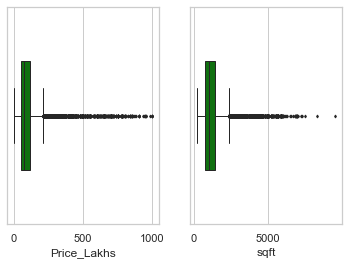

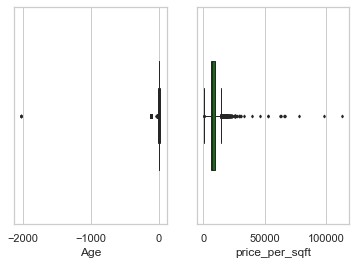

In [45]:
fig = plt.figure() # create figure

plot1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
plot2 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
sns.boxplot(x='Price_Lakhs',data=df,ax=plot1,width=0.5,color='green',fliersize=2,linewidth=1)
sns.boxplot(x='sqft',data=df,ax=plot2,width=0.5,color='green',fliersize=2,linewidth=1)



fig = plt.figure() # create figure

plot1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
plot2 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
sns.boxplot(x='Age',data=df,ax=plot1,width=0.5,color='green',fliersize=2,linewidth=1)
sns.boxplot(x='price_per_sqft',data=df,ax=plot2,width=0.5,color='green',fliersize=2,linewidth=1)

In [46]:
# df1 = df[(df['Build_year'] > 1980) & (df['price_per_sqft'] < 11000) & (df['sqft'] <= 6000) & (df['sqft'] > 250) & (df['bath'] < 7)]

In [48]:
# fig = plt.figure() # create figure

# plot1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
# plot2 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
# sns.boxplot(x='Price_Lakhs',data=df1,ax=plot1,width=0.5,color='green',fliersize=2,linewidth=1)
# sns.boxplot(x='sqft',data=df1,ax=plot2,width=0.5,color='green',fliersize=2,linewidth=1)

# fig = plt.figure() # create figure

# plot1 = fig.add_subplot(1,2,1) # add subplot 1 (1 row, 2 columns, first plot)
# plot2 = fig.add_subplot(1,2,2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**
# sns.boxplot(x='Age',data=df1,ax=plot1,width=0.5,color='green',fliersize=2,linewidth=1)
# sns.boxplot(x='price_per_sqft',data=df1,ax=plot2,width=0.5,color='green',fliersize=2,linewidth=1)

In [49]:
df.head()

,bhk,locality,sqft,price_per_sqft,bath,Price_Lakhs,Build_year,Age
0,2,Ravet,1000,4500,2.0,45.0,2022.0,1.0
1,1,Tathawade,670,5373,1.0,36.0,2026.0,5.0
2,2,Tathawade,1100,5363,2.0,59.0,2025.0,4.0
3,2,Ravet,1100,4909,2.0,54.0,2025.0,4.0
4,1,Bavdhan,664,5647,1.0,37.5,2024.0,3.0


In [50]:
df.to_csv('../3. Exploratory Data Analysis/Pune_Housing.csv')